In [1]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_test = pd.read_csv('2022_data_integrated.csv')
df_training = pd.read_csv('training_data_integrated.csv')
df_test_daily = pd.read_csv('2022_daily_data_integrated.csv')
df_training_daily = pd.read_csv('training_daily_data_integrated.csv')
df_test_weekly = pd.read_csv('test_weekly_data_integrated.csv')
df_training_weekly = pd.read_csv('training_weekly_data_integrated.csv')
df_test_monthly= pd.read_csv('test_monthly_data_integrated.csv')
df_training_monthly= pd.read_csv('training_monthly_data_integrated.csv')

In [3]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Bonn gesamt
### stündlich:

In [46]:
df_bonn = df_training[['Datetime', 'Bonn']]
df_bonn = df_bonn.rename(columns={'Datetime': 'ds', 'Bonn': 'y'})
df_bonn.head()

Index(['ds', 'y'], dtype='object')

17:06:21 - cmdstanpy - INFO - Chain [1] start processing
17:06:36 - cmdstanpy - INFO - Chain [1] done processing


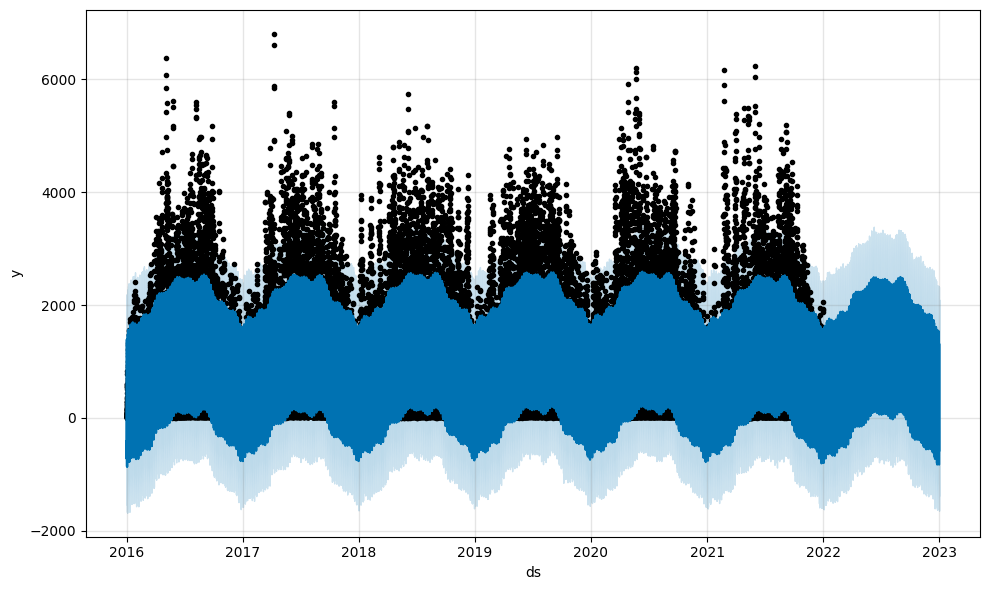

In [5]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.fit(df_bonn)
future = model.make_future_dataframe(periods=8760, freq='H')
forecast = model.predict(future)

fig = model.plot(forecast)

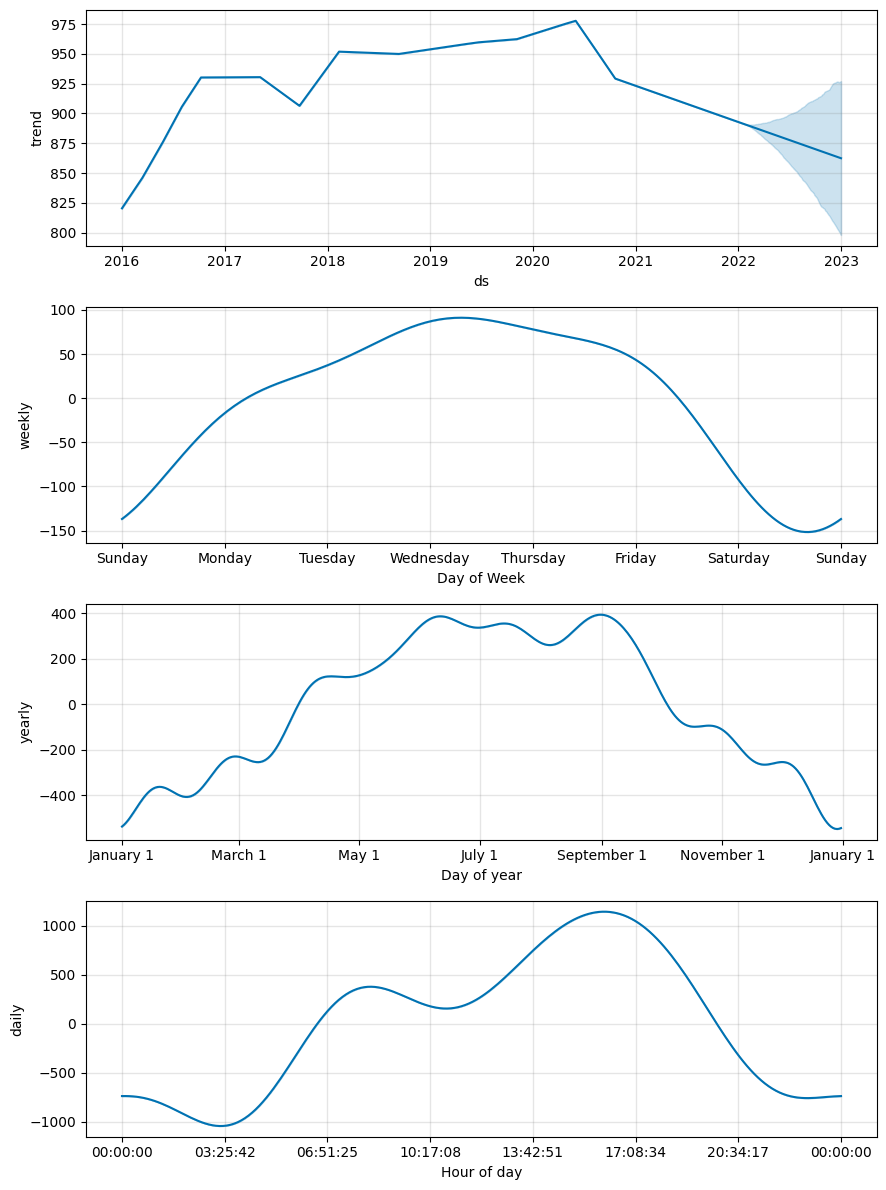

In [6]:
fig2 = model.plot_components(forecast)

<Axes: xlabel='ds'>

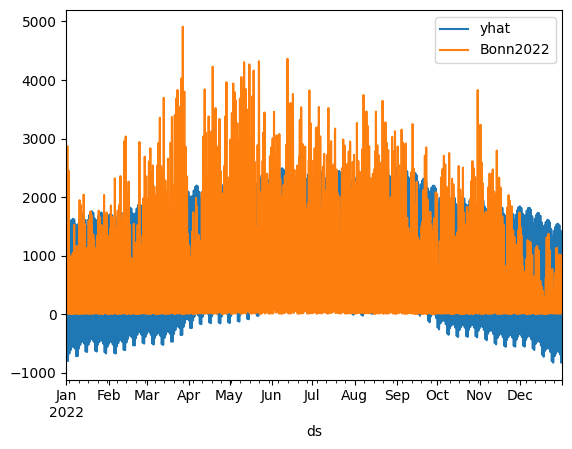

In [7]:
#forecast['yhat'] = forecast['yhat'].apply(lambda x: max(x, 0))
forecasted_values = forecast[['ds', 'yhat']].copy()
forecasted_values['ds'] = pd.to_datetime(forecasted_values['ds'])

measured_values = df_test[['Datetime', 'Bonn2022']].copy()
measured_values = measured_values.rename(columns={'Datetime': 'ds'})
measured_values['ds'] = pd.to_datetime(measured_values['ds'])

merged_data = pd.merge(forecasted_values, measured_values, on='ds', how='inner')
merged_data.set_index('ds', inplace=True)

merged_data.plot()

In [8]:
mae = mean_absolute_error(merged_data['Bonn2022'], merged_data['yhat'])
mse = mean_squared_error(merged_data['Bonn2022'], merged_data['yhat'])

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {math.sqrt(mse):.2f}")

Mean Absolute Error (MAE): 399.70
Root Mean Squared Error (RMSE): 532.10


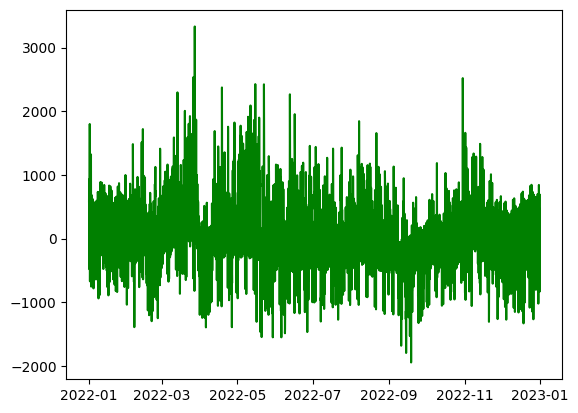

In [9]:
residuals = merged_data['Bonn2022'] - merged_data['yhat']
plt.plot(merged_data.index, residuals, label='Residuals', color='green')

### täglich

In [17]:
df_bonn_daily = df_training_daily[['Datetime', 'Bonn']]
df_bonn_daily = df_bonn_daily.rename(columns={'Datetime': 'ds', 'Bonn': 'y'})
filtered_df = df_bonn_daily[df_bonn_daily['y'] > 50000]
filtered_df

,ds,y
125,2016-05-05,51703.0
219,2016-08-07,50801.0
464,2017-04-09,50448.0
855,2018-05-05,51187.0
886,2018-06-05,54351.0
1602,2020-05-21,56494.0
1613,2020-06-01,50933.0
1976,2021-05-30,52816.0


13:44:46 - cmdstanpy - INFO - Chain [1] start processing
13:44:47 - cmdstanpy - INFO - Chain [1] done processing


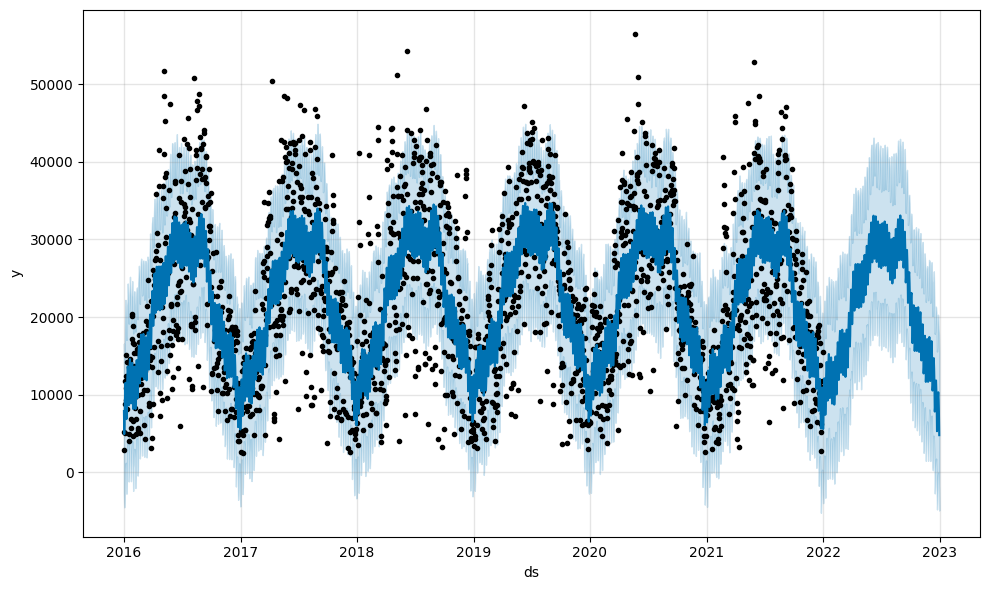

In [11]:
model_daily = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_daily.fit(df_bonn_daily)
future_daily = model_daily.make_future_dataframe(periods=365, freq='D')
forecast_daily = model_daily.predict(future_daily)

fig3 = model_daily.plot(forecast_daily)

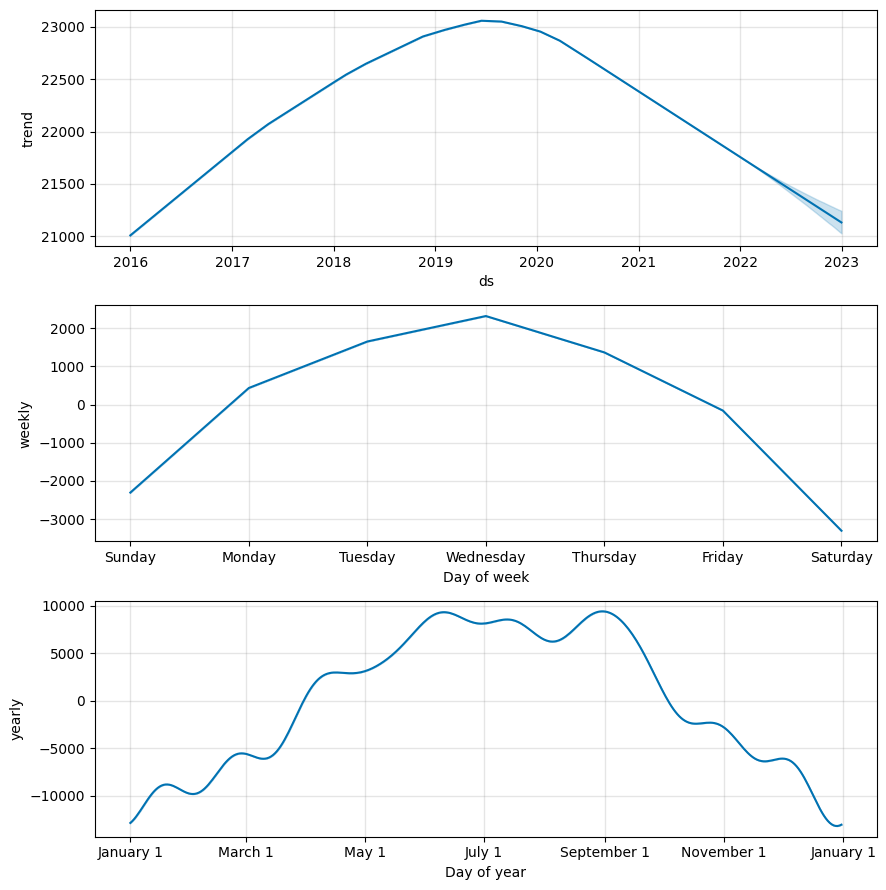

In [12]:
fig4 = model_daily.plot_components(forecast_daily)

<Axes: xlabel='ds'>

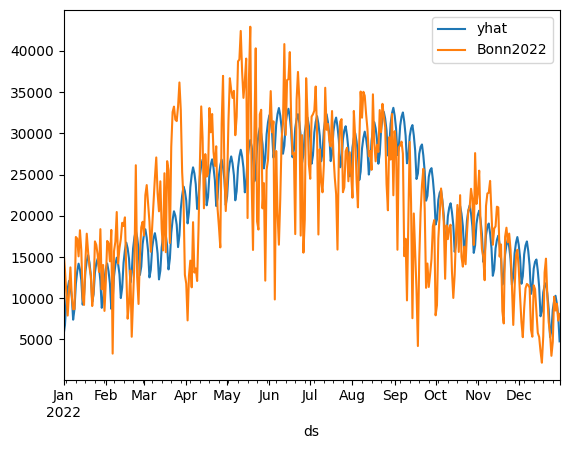

In [13]:
forecasted_values_daily = forecast_daily[['ds', 'yhat']].copy()
forecasted_values_daily['ds'] = pd.to_datetime(forecasted_values_daily['ds'])

measured_values_daily = df_test_daily[['Datetime', 'Bonn2022']].copy()
measured_values_daily = measured_values_daily.rename(columns={'Datetime': 'ds'})
measured_values_daily['ds'] = pd.to_datetime(measured_values_daily['ds'])

merged_data_daily = pd.merge(forecasted_values_daily, measured_values_daily, on='ds', how='inner')
merged_data_daily.set_index('ds', inplace=True)

merged_data_daily.plot()

In [14]:
mae_daily = mean_absolute_error(merged_data_daily['Bonn2022'], merged_data_daily['yhat'])
mse_daily = mean_squared_error(merged_data_daily['Bonn2022'], merged_data_daily['yhat'])
mape_daily = mean_absolute_percentage_error(merged_data_daily['Bonn2022'], merged_data_daily['yhat'])

print(f"Mean Absolute Error (MAE): {mae_daily:.2f}")
print(f"Root Mean Squared Error (RMSE): {math.sqrt(mse_daily):.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_daily:.2f}")

Mean Absolute Error (MAE): 5191.04
Root Mean Squared Error (RMSE): 6695.67
Mean Absolute Percentage Error (MAPE): 33.23


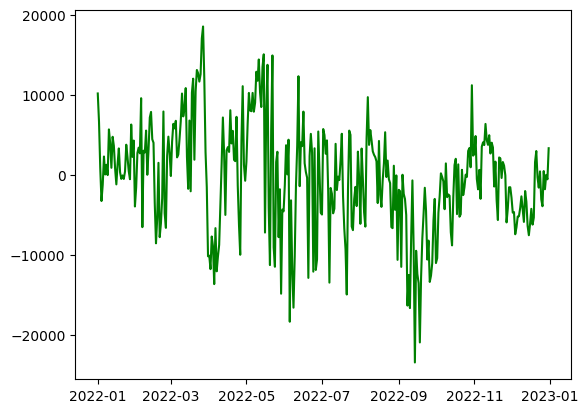

In [15]:
residuals_daily = merged_data_daily['Bonn2022'] - merged_data_daily['yhat']
plt.plot(merged_data_daily.index, residuals_daily, label='Residuals', color='green')

### Kennedybrücke

13:45:07 - cmdstanpy - INFO - Chain [1] start processing
13:45:07 - cmdstanpy - INFO - Chain [1] done processing


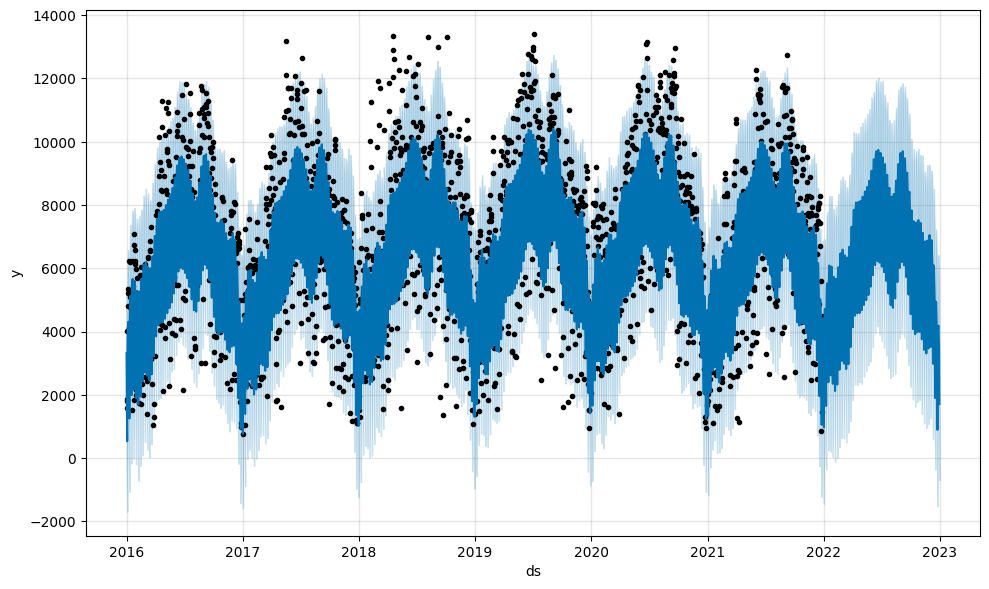

In [16]:
df_kennedy = df_training_daily[['Datetime', 'KennedyBrücke']]
df_kennedy = df_kennedy.rename(columns={'Datetime': 'ds', 'KennedyBrücke': 'y'})
model2 = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model2.fit(df_kennedy)
future2 = model2.make_future_dataframe(periods=365, freq='D')
forecast2 = model2.predict(future2)

fig2 = model2.plot(forecast2)

<Axes: xlabel='ds'>

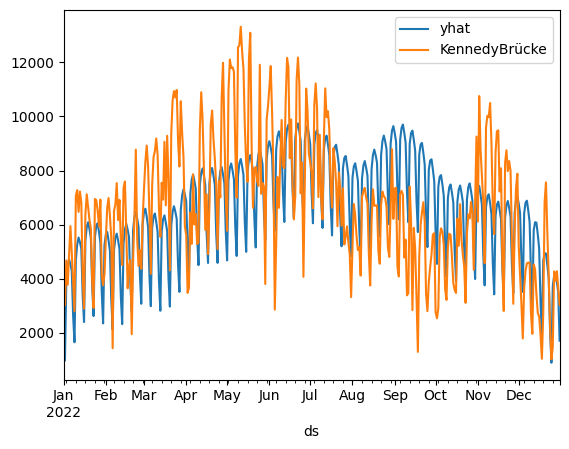

In [17]:
#forecast2['yhat'] = forecast2['yhat'].apply(lambda x: max(x, 0))
forecasted_values2 = forecast2[['ds', 'yhat']].copy()
forecasted_values2['ds'] = pd.to_datetime(forecasted_values2['ds'])

measured_values2 = df_test_daily[['Datetime', 'KennedyBrücke']].copy()
measured_values2 = measured_values2.rename(columns={'Datetime': 'ds'})
measured_values2['ds'] = pd.to_datetime(measured_values2['ds'])

merged_data2 = pd.merge(forecasted_values2, measured_values2, on='ds', how='inner')
merged_data2.set_index('ds', inplace=True)

merged_data2.plot()

In [18]:
mae2 = mean_absolute_error(merged_data2['KennedyBrücke'], merged_data2['yhat'])
mse2 = mean_squared_error(merged_data2['KennedyBrücke'], merged_data2['yhat'])
mape2 = mean_absolute_percentage_error(merged_data2['KennedyBrücke'], merged_data2['yhat'])

print(f"Mean Absolute Error (MAE): {mae2:.2f}")
print(f"Root Mean Squared Error (RMSE): {math.sqrt(mse2):.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape2:.2f}")

Mean Absolute Error (MAE): 1775.74
Root Mean Squared Error (RMSE): 2101.86
Mean Absolute Percentage Error (MAPE): 30.86


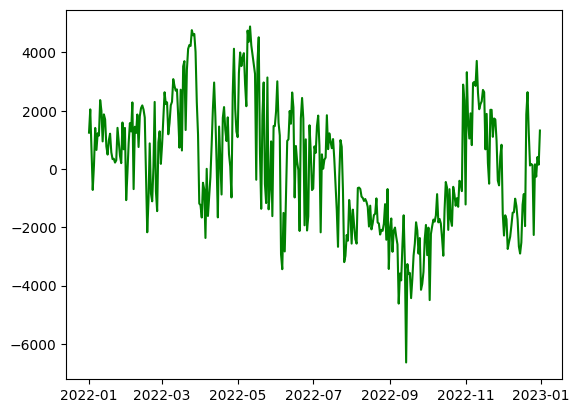

In [19]:
residuals2 = merged_data2['KennedyBrücke'] - merged_data2['yhat']
plt.plot(merged_data2.index, residuals2, label='Residuals', color='green')

### Tuning

TODO: feiertage etc modellieren

In [6]:
holidays = pd.read_csv('df_gesetzliche_feiertage.csv')

In [10]:
model_holiday = Prophet(holidays=holidays)
model_holiday.add_country_holidays(country_name='Germany')
model_holiday.fit(df_bonn_daily)
model_holiday.train_holiday_names

17:13:03 - cmdstanpy - INFO - Chain [1] start processing
17:13:03 - cmdstanpy - INFO - Chain [1] done processing


0                       Neujahr
1                        Ostern
2                        1. Mai
3           Christi Himmelfahrt
4                     Pfingsten
5                  Fronleichnam
6     Tag der deutschen Einheit
7                 Allerheiligen
8                   Weihnachten
9                New Year's Day
10                  Good Friday
11                Easter Monday
12                    Labor Day
13                Ascension Day
14                  Whit Monday
15             German Unity Day
16                Christmas Day
17      Second Day of Christmas
18              Reformation Day
dtype: object

17:14:44 - cmdstanpy - INFO - Chain [1] start processing
17:14:44 - cmdstanpy - INFO - Chain [1] done processing


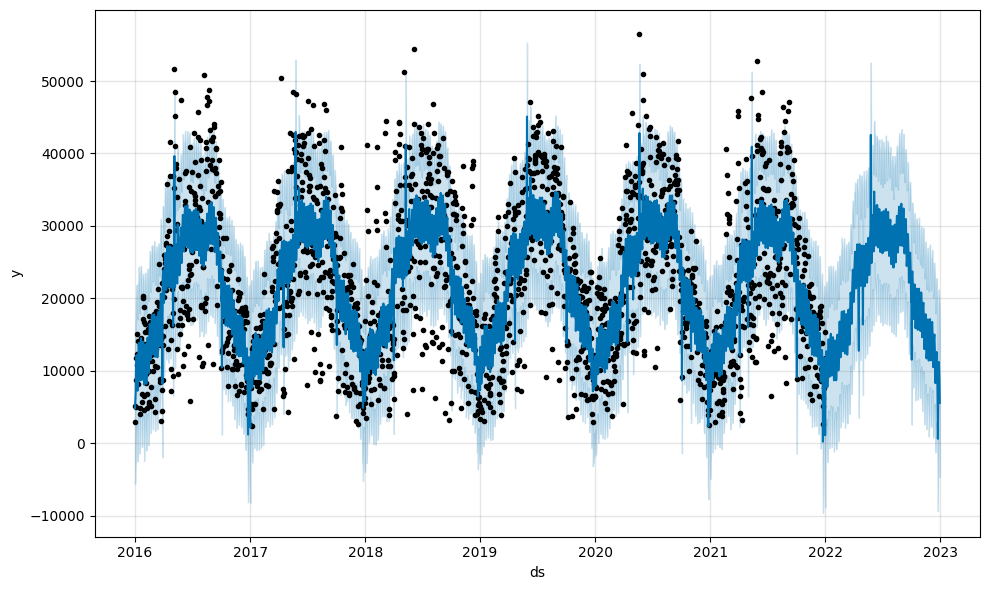

In [12]:
model_holiday = Prophet(holidays=holidays)
model_holiday.add_country_holidays(country_name='Germany')
model_holiday.fit(df_bonn_daily)
future_holiday = model_holiday.make_future_dataframe(periods=365, freq='D')
forecast_holiday = model_holiday.predict(future_holiday)

fig5 = model_holiday.plot(forecast_holiday)

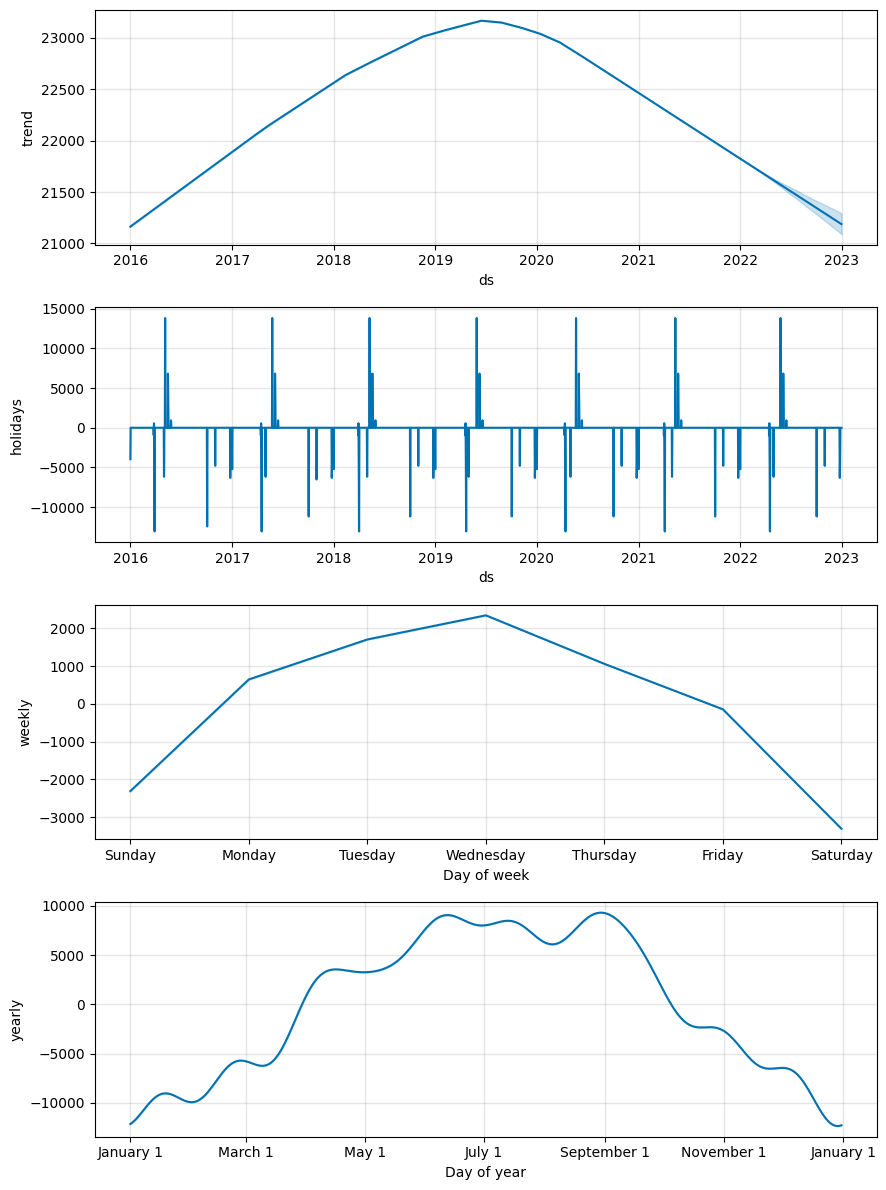

In [15]:
fig6 = model_holiday.plot_components(forecast_holiday)

<Axes: xlabel='ds'>

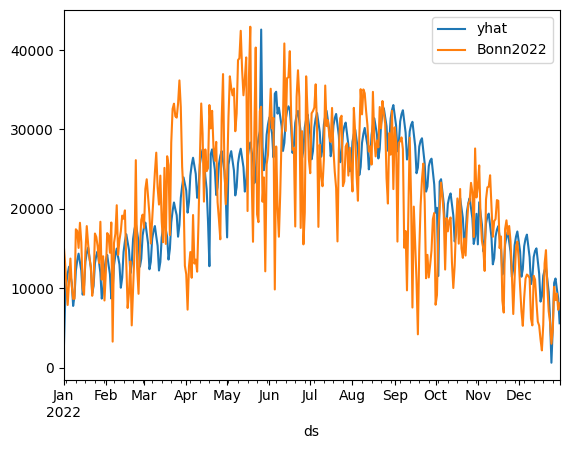

In [13]:
forecasted_values_holiday = forecast_holiday[['ds', 'yhat']].copy()
forecasted_values_holiday['ds'] = pd.to_datetime(forecasted_values_holiday['ds'])

measured_values_holiday = df_test_daily[['Datetime', 'Bonn2022']].copy()
measured_values_holiday = measured_values_holiday.rename(columns={'Datetime': 'ds'})
measured_values_holiday['ds'] = pd.to_datetime(measured_values_holiday['ds'])

merged_data_holiday = pd.merge(forecasted_values_holiday, measured_values_holiday, on='ds', how='inner')
merged_data_holiday.set_index('ds', inplace=True)

merged_data_holiday.plot()

In [14]:
mae_h = mean_absolute_error(merged_data_holiday['Bonn2022'], merged_data_holiday['yhat'])
mse_h = mean_squared_error(merged_data_holiday['Bonn2022'], merged_data_holiday['yhat'])
mape_h = mean_absolute_percentage_error(merged_data_holiday['Bonn2022'], merged_data_holiday['yhat'])

print(f"Mean Absolute Error (MAE): {mae_h:.2f}")
print(f"Root Mean Squared Error (RMSE):  {math.sqrt(mse_h):.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_h:.2f}")

Mean Absolute Error (MAE): 5323.60
Root Mean Squared Error (RMSE):  6919.84
Mean Absolute Percentage Error (MAPE): 33.89


### wöchentlich

In [16]:
df_bonn_weekly = df_training_weekly[['Datetime', 'Bonn']]
df_bonn_weekly = df_bonn_weekly.rename(columns={'Datetime': 'ds', 'Bonn': 'y'})
df_bonn_weekly

,ds,y
0,2016-01-03,13045.0
1,2016-01-10,76196.0
2,2016-01-17,66791.0
3,2016-01-24,80268.0
4,2016-01-31,104299.0
...,...,...
309,2021-12-05,83995.0
310,2021-12-12,95570.0
311,2021-12-19,108743.0
312,2021-12-26,74578.0


14:16:10 - cmdstanpy - INFO - Chain [1] start processing
14:16:10 - cmdstanpy - INFO - Chain [1] done processing


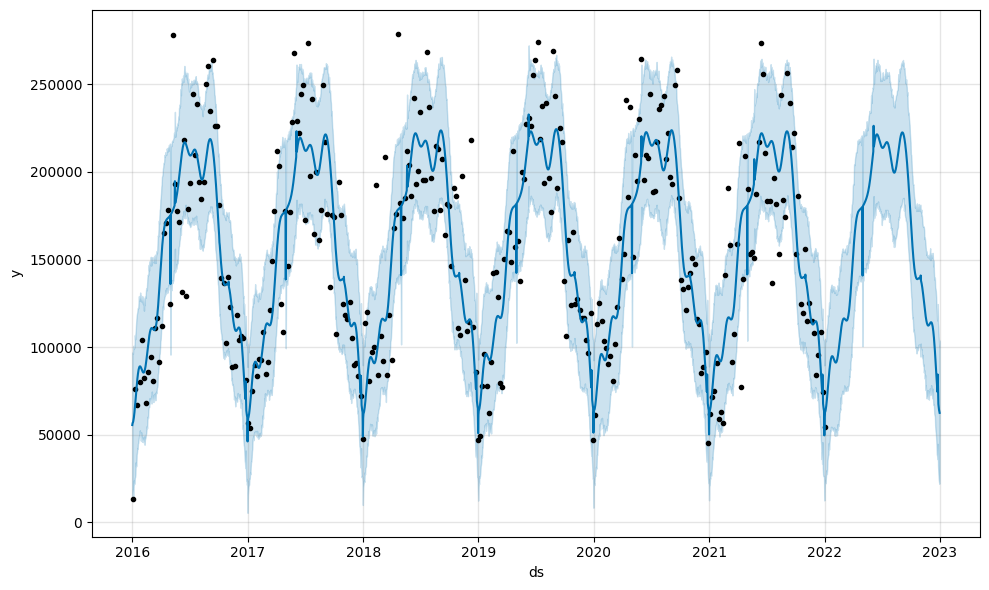

In [61]:
model_weekly = Prophet(holidays=holidays, yearly_seasonality=True)
model_weekly.fit(df_bonn_weekly)
future_weekly = model_weekly.make_future_dataframe(periods=52, freq='W')
forecast_weekly = model_weekly.predict(future_daily)

fig3 = model_weekly.plot(forecast_weekly)

<Axes: xlabel='ds'>

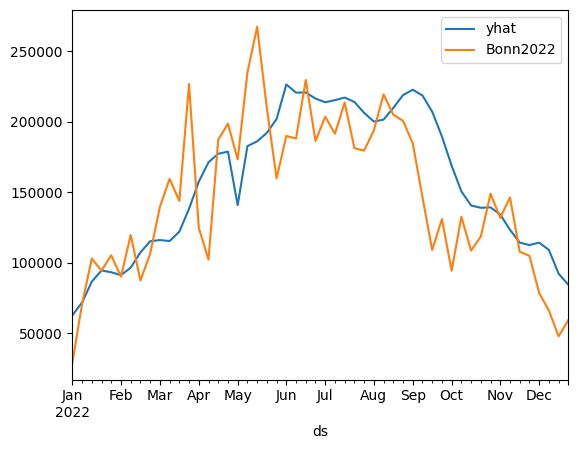

In [62]:
forecasted_values_weekly = forecast_weekly[['ds', 'yhat']].copy()
forecasted_values_weekly['ds'] = pd.to_datetime(forecasted_values_weekly['ds'])

measured_values_weekly = df_test_weekly[['Datetime', 'Bonn2022']].copy()
measured_values_weekly = measured_values_weekly.rename(columns={'Datetime': 'ds'})
measured_values_weekly['ds'] = pd.to_datetime(measured_values_weekly['ds'])

merged_data_weekly = pd.merge(forecasted_values_weekly, measured_values_weekly, on='ds', how='inner')
merged_data_weekly.set_index('ds', inplace=True)

merged_data_weekly.plot()

In [63]:
mae_w = mean_absolute_error(merged_data_weekly['Bonn2022'], merged_data_weekly['yhat'])
mse_w = mean_squared_error(merged_data_weekly['Bonn2022'], merged_data_weekly['yhat'])
mape_w = mean_absolute_percentage_error(merged_data_weekly['Bonn2022'], merged_data_weekly['yhat'])

print(f"Mean Absolute Error (MAE): {mae_w:.2f}")
print(f"Root Mean Squared Error (RMSE):  {math.sqrt(mse_w):.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_w:.2f}")

Mean Absolute Error (MAE): 29068.09
Root Mean Squared Error (RMSE):  37234.88
Mean Absolute Percentage Error (MAPE): 24.38


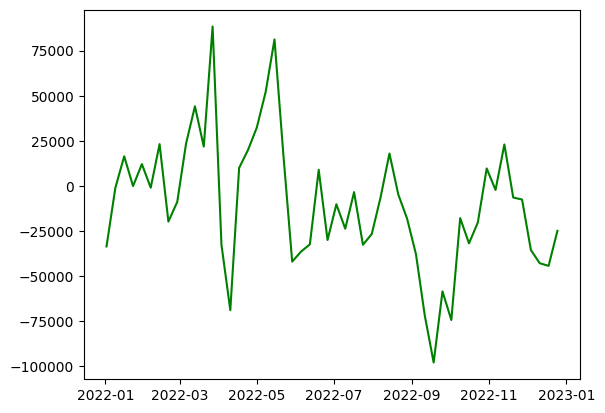

In [65]:
residuals_weekly = merged_data_weekly['Bonn2022'] - merged_data_weekly['yhat']
plt.plot(merged_data_weekly.index, residuals_weekly, label='Residuals', color='green')

In [73]:
df_bonn_monthly = df_training_monthly[['Datetime', 'Bonn']]
df_bonn_monthly = df_bonn_monthly.rename(columns={'Datetime': 'ds', 'Bonn': 'y'})
df_bonn_monthly.head()

,ds,y
0,2016-01-31,340599.0
1,2016-02-29,348947.0
2,2016-03-31,423557.0
3,2016-04-30,691519.0
4,2016-05-31,882133.0


14:30:46 - cmdstanpy - INFO - Chain [1] start processing
14:30:46 - cmdstanpy - INFO - Chain [1] done processing


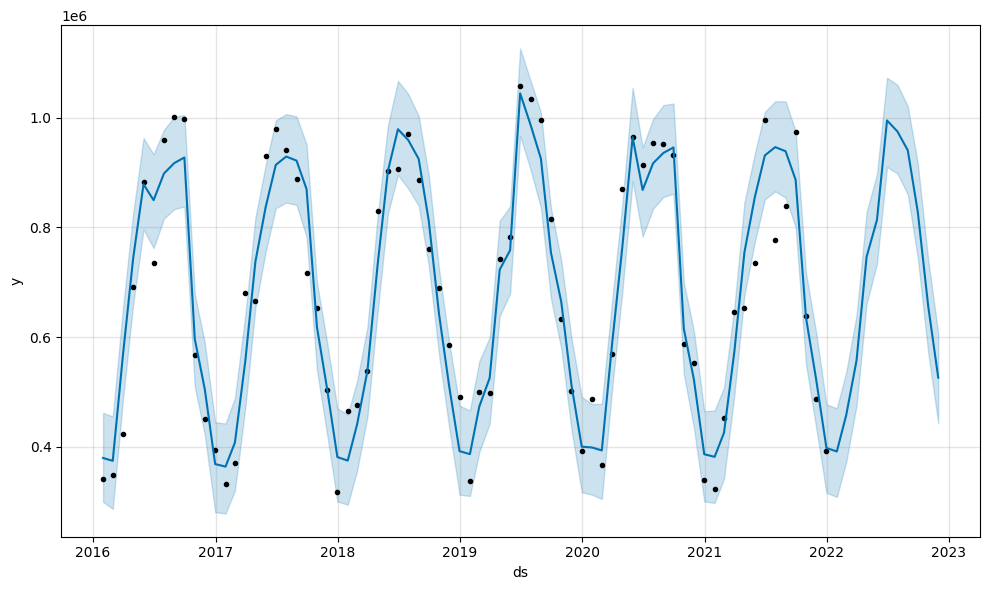

In [77]:
model_monthly = Prophet(holidays=holidays, yearly_seasonality=True)
model_monthly.fit(df_bonn_monthly)
future_monthly = model_monthly.make_future_dataframe(periods=11, freq='M')
forecast_monthly = model_monthly.predict(future_monthly)

fig3 = model_monthly.plot(forecast_monthly)

<Axes: xlabel='ds'>

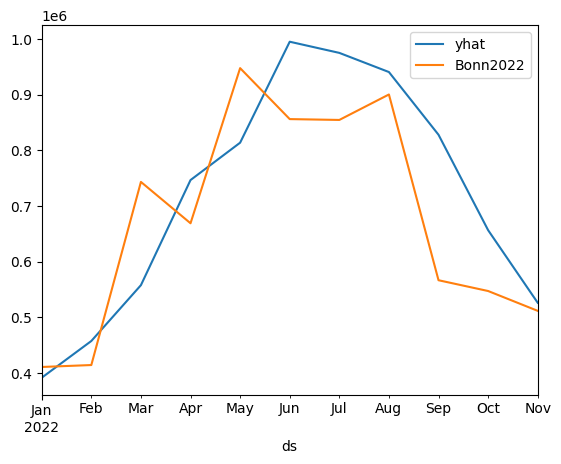

In [78]:
forecasted_values_monthly = forecast_monthly[['ds', 'yhat']].copy()
forecasted_values_monthly['ds'] = pd.to_datetime(forecasted_values_monthly['ds'])

measured_values_monthly = df_test_monthly[['Datetime', 'Bonn2022']].copy()
measured_values_monthly = measured_values_monthly.rename(columns={'Datetime': 'ds'})
measured_values_monthly['ds'] = pd.to_datetime(measured_values_monthly['ds'])

merged_data_monthly = pd.merge(forecasted_values_monthly, measured_values_monthly, on='ds', how='inner')
merged_data_monthly.set_index('ds', inplace=True)

merged_data_monthly.plot()

In [79]:
mae_m = mean_absolute_error(merged_data_monthly['Bonn2022'], merged_data_monthly['yhat'])
mse_m = mean_squared_error(merged_data_monthly['Bonn2022'], merged_data_monthly['yhat'])
mape_m = mean_absolute_percentage_error(merged_data_monthly['Bonn2022'], merged_data_monthly['yhat'])

print(f"Mean Absolute Error (MAE): {mae_m:.2f}")
print(f"Root Mean Squared Error (RMSE):  {math.sqrt(mse_m):.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_m:.2f}")

Mean Absolute Error (MAE): 104008.35
Root Mean Squared Error (RMSE):  126637.06
Mean Absolute Percentage Error (MAPE): 15.41


14:40:45 - cmdstanpy - INFO - Chain [1] start processing
14:40:45 - cmdstanpy - INFO - Chain [1] done processing


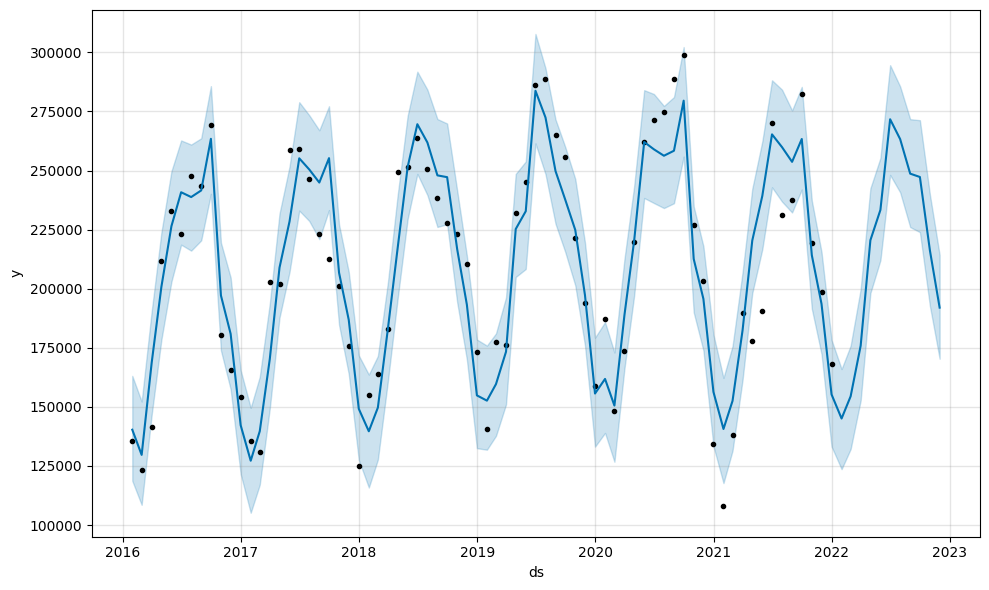

In [86]:
df_kennedy_monthly = df_training_monthly[['Datetime', 'KennedyBrücke']]
df_kennedy_monthly = df_kennedy_monthly.rename(columns={'Datetime': 'ds', 'KennedyBrücke': 'y'})
model_k_monthly = Prophet(holidays=holidays, yearly_seasonality=True)
model_k_monthly.fit(df_kennedy_monthly)
future_k_monthly = model_k_monthly.make_future_dataframe(periods=11, freq='M')
forecast_k_monthly = model_k_monthly.predict(future_k_monthly)

fig2 = model_k_monthly.plot(forecast_k_monthly)

<Axes: xlabel='ds'>

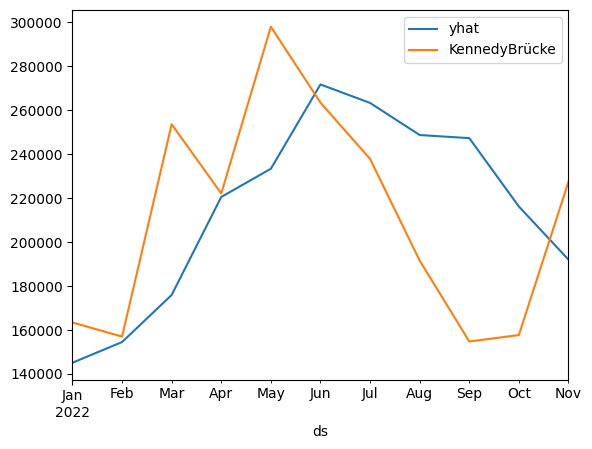

In [87]:
forecasted_values_k_monthly = forecast_k_monthly[['ds', 'yhat']].copy()
forecasted_values_k_monthly['ds'] = pd.to_datetime(forecasted_values_k_monthly['ds'])

measured_values_k_monthly = df_test_monthly[['Datetime', 'KennedyBrücke']].copy()
measured_values_k_monthly = measured_values_k_monthly.rename(columns={'Datetime': 'ds'})
measured_values_k_monthly['ds'] = pd.to_datetime(measured_values_k_monthly['ds'])

merged_data_k_monthly = pd.merge(forecasted_values_k_monthly, measured_values_k_monthly, on='ds', how='inner')
merged_data_k_monthly.set_index('ds', inplace=True)

merged_data_k_monthly.plot()

In [88]:
mae_mk = mean_absolute_error(merged_data_k_monthly['KennedyBrücke'], merged_data_k_monthly['yhat'])
mse_mk = mean_squared_error(merged_data_k_monthly['KennedyBrücke'], merged_data_k_monthly['yhat'])
mape_mk = mean_absolute_percentage_error(merged_data_k_monthly['KennedyBrücke'], merged_data_k_monthly['yhat'])

print(f"Mean Absolute Error (MAE): {mae_mk:.2f}")
print(f"Root Mean Squared Error (RMSE):  {math.sqrt(mse_mk):.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_mk:.2f}")

Mean Absolute Error (MAE): 40181.59
Root Mean Squared Error (RMSE):  50245.44
Mean Absolute Percentage Error (MAPE): 20.18


In [ ]:
#TODO: Mehr "Feiertage" definieren und Trenddaten aus der Zerlegung herausfiltern
#Dann noch mal tägliche und Wöchentliche Vorhersagen versuchen
#Notieren, inwiefern die Anpassungen helfen und wie gut die Prog. mit Prophet ist
#Präsi vorbereiten

### Temperatur

In [99]:
df_bonn_integrated = pd.read_csv('prophet_bonn_integrated.csv')
df_bonn_integrated = df_bonn_integrated[['ds', 'y', 'temp']]


In [101]:
df_bonn_integrated['temp'] = np.where((df_bonn_integrated['temp'] < -10.0), np.nan, df_bonn_integrated['temp'])
df_bonn_integrated['temp'].fillna(-10.0, inplace=True)

In [104]:
df_bonn_integrated.min()

ds      2016-01-01 00:00:00
y                       0.0
temp                  -10.0
dtype: object

19:47:48 - cmdstanpy - INFO - Chain [1] start processing
19:48:13 - cmdstanpy - INFO - Chain [1] done processing


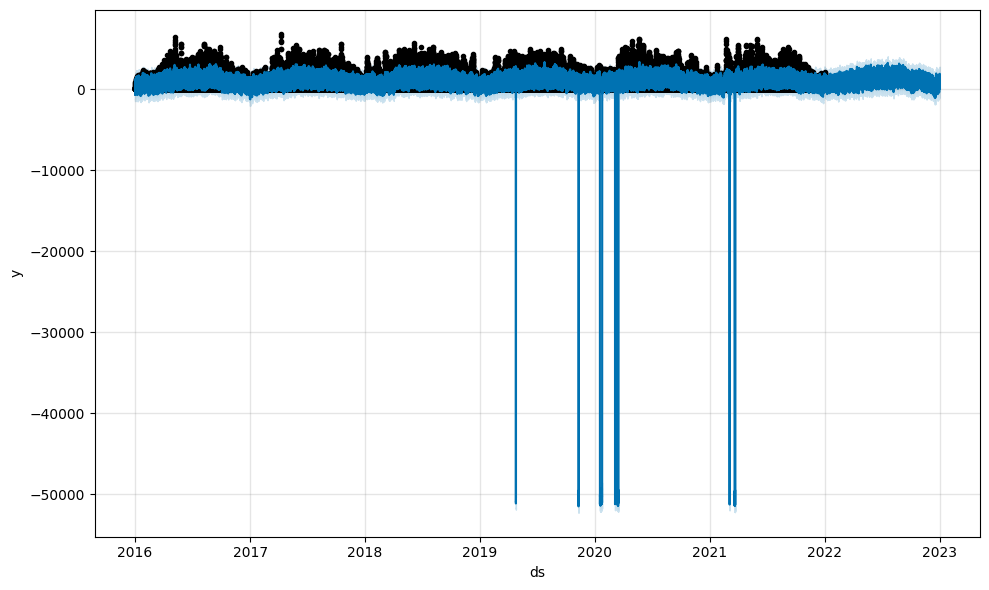

In [103]:
model_new = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model_new.add_country_holidays(country_name='Germany')
model_new.add_regressor('temp')
model_new.fit(df_bonn_integrated)
future_new = model_new.make_future_dataframe(periods=8760, freq='H')
future_new['temp'] = pd.concat([df_training['Temperature (°C)'], df_test['Temperature (°C)']], ignore_index=True)
forecast_new = model_new.predict(future_new)

fig = model_new.plot(forecast_new)

In [88]:
df_temp = pd.read_csv('temp_daily.csv')

df_daily_integrated = pd.concat([df_bonn_daily, df_temp['Temperature (°C)']], axis=1)

In [92]:
df_daily_integrated = df_daily_integrated.rename(columns={'Temperature (°C)': 'temp'})

In [95]:
df_daily_integrated.to_csv('prophet_daily_integrated.csv')

In [56]:
model_new = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model_new.add_country_holidays(country_name='Germany')
model_new.add_regressor('temp')
model_new.fit(df_daily_integrated)
future_new = model_new.make_future_dataframe(periods=365, freq='D')
future_new['temp'] = pd.concat([df_training['Temperature (°C)'], df_test['Temperature (°C)']], ignore_index=True)
forecast_new = model_new.predict(future_new)

fig = model_new.plot(forecast_new)

,ds,temp
0,2016-01-01 00:00:00,4.7
1,2016-01-01 01:00:00,4.3
2,2016-01-01 02:00:00,4.7
3,2016-01-01 03:00:00,4.6
4,2016-01-01 04:00:00,5.0
...,...,...
61363,2022-12-31 19:00:00,15.2
61364,2022-12-31 20:00:00,15.2
61365,2022-12-31 21:00:00,14.9
61366,2022-12-31 22:00:00,15.2


,Datetime,Temperature (°C),Precipitations (mm),Wind Speed (m/s),Estermannufer,VonSandtUfer,Rhenusallee,BrühlerStraße,WilhelmSpiritusUfer,McCloyWeg,WegDammBonnBeuel,NordBrücke,SüdBrücke,KennedyBrücke,Bonn2022
0,2022-01-01 00:00:00,12.8,0.0,3.3,0.0,12.0,11.0,8.0,12.0,3.0,2.0,5.0,17.0,38.0,108.0
1,2022-01-01 01:00:00,12.1,0.0,3.5,2.0,18.0,11.0,13.0,7.0,2.0,17.0,9.0,22.0,94.0,195.0
2,2022-01-01 02:00:00,12.4,0.0,3.6,3.0,7.0,18.0,7.0,9.0,6.0,21.0,5.0,27.0,97.0,200.0
3,2022-01-01 03:00:00,12.2,0.0,2.7,1.0,0.0,9.0,5.0,9.0,1.0,8.0,5.0,12.0,89.0,139.0
4,2022-01-01 04:00:00,11.9,0.1,3.2,2.0,0.0,7.0,6.0,1.0,0.0,5.0,8.0,15.0,40.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,15.2,0.0,6.6,1.0,8.0,0.0,11.0,12.0,5.0,28.0,16.0,8.0,212.0,309.0
8756,2022-12-31 20:00:00,15.2,0.0,6.9,0.0,13.0,0.0,7.0,13.0,4.0,19.0,8.0,9.0,125.0,201.0
8757,2022-12-31 21:00:00,14.9,0.0,6.6,2.0,1.0,0.0,11.0,19.0,1.0,11.0,8.0,9.0,69.0,133.0
8758,2022-12-31 22:00:00,15.2,0.0,5.5,0.0,6.0,0.0,2.0,21.0,1.0,15.0,4.0,11.0,71.0,131.0
